In [6]:
from sklearn.model_selection import train_test_split

import math
import matplotlib.pyplot as plot
import numpy as np
from random import gauss, uniform
import tensorflow as tf

from Util import PolyStr, PolyVal, SetSeed

print(f'TensorFlow version:  {tf.__version__}')

TensorFlow version:  2.16.1


In [2]:
# define the function
coefs = [1, 0.2, 0.7, 1, -0.5]
funcStr = PolyStr(coefs, 'x')
print(funcStr)

inRange = (0, 2.5)

-0.5x^4 + x^3 + 0.7x^2 + 0.2x + 1


In [3]:
# other constants
noiseStd = 0.15
seed = None

trainSize = 1000
epochs = 500

dotColor = 'maroon'
lineColor = 'blue'
markerSize = 2
nGraphPoint= 101

In [12]:
# define the ground truth function
def quartic_func(in_val, weights=quartic_weights):
    powers = np.array([4, 3, 2, 1])
    in_vals = np.array([in_val, in_val, in_val, in_val])

    out_val = np.sum( np.power(in_vals, powers) * (weights[:4]) ) + weights[-1]
    
    return out_val


def sample(n, domain_start=0, domain_end=1, noiseStd=0.2, function=quartic_func, weights=quartic_weights):
    random.seed(2525)
    dom_arr = []
    range_arr = []

    for n in range(n-1):
        dom_val = (random.random() * (domain_end - domain_start)) + domain_start
        dom_val = dom_val + (random.gauss(0, noiseStd))

        range_val = function(dom_val, weights)
        range_val = range_val + (random.gauss(0, noiseStd))

        if (domain_start <= dom_val) and (dom_val < domain_end):
            dom_arr.append(dom_val)
            range_arr.append(range_val)

    return [dom_arr, range_arr]

NameError: name 'quartic_weights' is not defined

In [ ]:
def quartic_func_bulk(in_arr, weights=quartic_weights):
    y = map(quartic_func, in_arr, [weights]*len(in_arr))
    y = np.array(list(y))
    return y

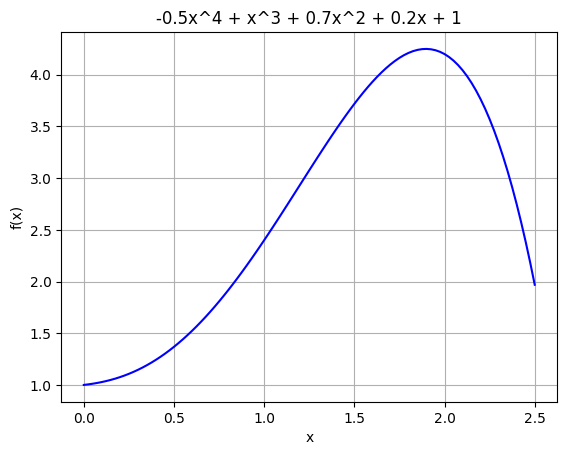

In [19]:
# plot the underlying quartic function and the generated samples
xTruth = np.linspace(0, 2.5, nGraphPoint)
yTruth = PolyVal(coefs,xTruth)

plot.plot(xTruth, yTruth, color=lineColor)

plot.xlabel('x')
plot.ylabel('f(x)')
plot.title(f'{PolyStr(coefs, 'x')}')
plot.grid(True)

plot.show()

seed = 27236.750271010394


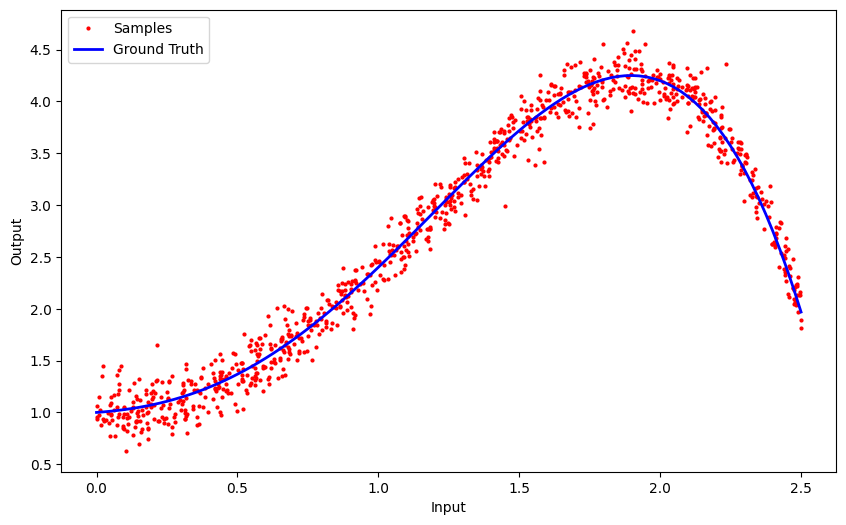

In [8]:
seed = SetSeed(seed)
print(f'seed = {seed}')

inSamp = [uniform(*inRange) for _ in range(trainSize)]
outSamp = [PolyVal(coefs, x) + gauss(0, noiseStd) for x in inSamp]

figSize = (10,6)
fig, ax = plot.subplots(figsize=figSize)

plot.plot(inSamp, outSamp, 'o', color='red', markersize=markerSize, label='Samples', zorder=-1)
plot.plot(xTruth, yTruth, color=lineColor, linewidth=2, label='Ground Truth', zorder=0)

plot.xlabel("Input")
plot.ylabel("Output")
plot.legend(loc='upper left')

plot.show()

In [6]:
# make a training and test split
x_train, x_test , y_train , y_test = train_test_split(model_input, labels, test_size=0.1, random_state=42)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# print(x_train)
# print(y_train)

(834, 1)
(834, 1)
(93, 1)
(93, 1)


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500),
    tf.keras.layers.LeakyReLU(negative_slope=0.3),
    tf.keras.layers.Dense(500),
    tf.keras.layers.LeakyReLU(negative_slope=0.3),
    tf.keras.layers.Dense(1)
])

In [10]:
loss_fn = tf.keras.losses.MeanSquaredError(reduction="sum_over_batch_size")
# loss_fn = tf.keras.losses.MeanAbsolutePercentageError()

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

In [16]:
inTrain = np.array(inSamp).reshape(-1,1)
print(inTrain.shape)

outTrain = np.array(outSamp).reshape(-1,1)
print(outTrain.shape)

(1000, 1)
(1000, 1)


In [17]:
model.fit(inTrain, outTrain, epochs=epochs)

Epoch 1/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 2.8452 - mean_absolute_percentage_error: 47.8399
Epoch 2/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5747 - mean_absolute_percentage_error: 20.5665
Epoch 3/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4569 - mean_absolute_percentage_error: 17.7546
Epoch 4/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4725 - mean_absolute_percentage_error: 19.9576
Epoch 5/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4365 - mean_absolute_percentage_error: 20.1207
Epoch 6/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4040 - mean_absolute_percentage_error: 19.6279
Epoch 7/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3994 - mean_absolute_percentage_error: 19.9293
Epoch 8/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4105 - mean_absolute_percentage_error: 19.9135
Epoch 9/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4246 - mean_absolute_percentage_error: 20.1586
Epoch 10/500
32/32 ━━━━━━━━━

In [20]:
yPredict = model.predict(xTruth)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


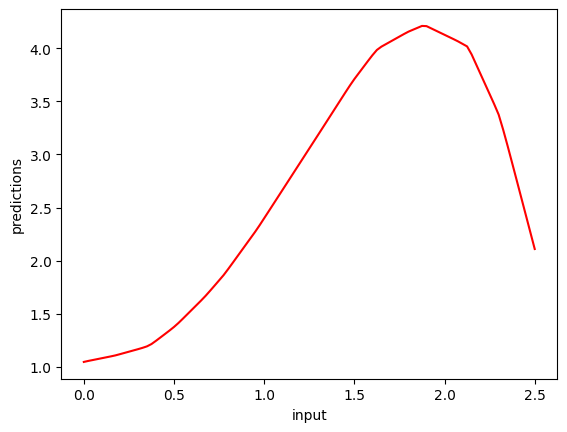

In [21]:
# plot.plot( x, quartic_func_bulk(x, quartic_weights) )
plot.plot( xTruth, yPredict, c='red')

plot.xlabel("input")
plot.ylabel("predictions")

plot.show()

In [99]:
# plot accuracy over a range of training sample sizes
# for now, go from 1 to 1000 training samples
# train model once per sample size (may want to change this later to deal with stochasticity)

ratioOfTest = 0.1
noiseStd = 0.5
epochs = 500

errors = []
min_trainSize = 5
max_trainSize = 1000
max_sampleSize = math.floor(targetTrainSize / (1 - ratioOfTest))
num_experiments = 100
samplesize_increment = math.floor((max_trainSize - min_trainSize) / num_experiments)

train_sizes = range(min_trainSize, max_trainSize, samplesize_increment)

for num_trains in train_sizes:
    num_samples = math.floor(num_trains / (1 - ratioOfTest) )

    sampleset = sample(num_samples, domain_start=0, domain_end=2.5, noiseStd=noiseStd, function=quartic_func)
    model_input = sampleset[0]
    labels = sampleset[1]

    x_train, x_test , y_train , y_test = train_test_split(model_input, labels, test_size=ratioOfTest, random_state=42)
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    x_train = x_train.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    loss_fn = tf.keras.losses.MeanSquaredError(reduction="sum_over_batch_size")

    model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=[tf.keras.metrics.MeanSquaredError()])

    model.fit(
        x_train,
        y_train,
        epochs=500
    )

    results = model.evaluate(x_test, y_test)

    errors.append(np.sum(results))

    print("num training samples: ", num_samples)

Epoch 1/500
1/1 [==============================] - 0s 406ms/step - loss: 0.3628 - mean_squared_error: 0.3628
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2520 - mean_squared_error: 0.2520
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1856 - mean_squared_error: 0.1856
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1459 - mean_squared_error: 0.1459
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1183 - mean_squared_error: 0.1183
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0957 - mean_squared_error: 0.0957
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0776 - mean_squared_error: 0.0776
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 10/500
1/1 [=================

Text(0.5, 1.0, 'Mean Squared Error As A Function of Training Size')

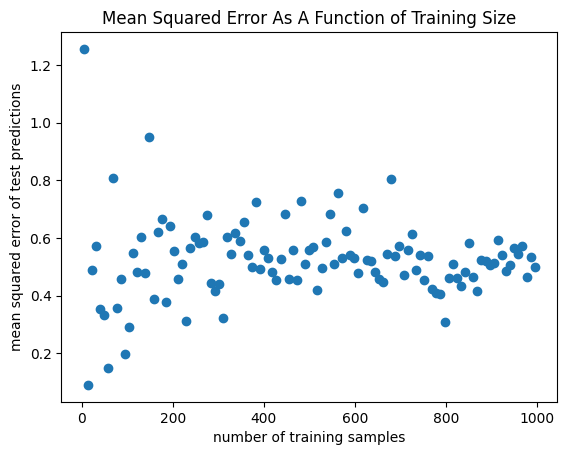

In [101]:
plot.scatter( train_sizes, errors )
plot.xlabel("number of training samples")
plot.ylabel("mean squared error of test predictions")
plot.title("Mean Squared Error As A Function of Training Size")